Actividad 3 | Kmeans.
> Por: Alexa Andivi Calderón Sánchez.

> Matrícula: A01637520.

Análisis de la base de datos de las flores Iris.

In [1]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Import sklearn KMeans
from sklearn.cluster import KMeans

In [2]:
# Define where you are running the code: colab or local
RunInColab          = True     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

else:
    # Define path del proyecto
    Ruta            = ""

Mounted at /content/drive


In [3]:
# Dataset url
url = Ruta + "iris.csv"

# Load the dataset
df  = pd.read_csv(url)

#Cargar la base de datos
url = Ruta + "iris.csv"
df = pd.read_csv(url,names=['SepalLength', 'SepalWidth', 'PetalLength','PetalWidth','FlowerType'])
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,FlowerType
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# get the number of observations and variables
Ob = df.shape[0]
Va = df.shape[1]
print("La base de datos posee un total de ", Ob ,"filas y son ", Va, "Variables.")

La base de datos posee un total de  150 filas y son  5 Variables.


In [5]:
# Drop rows with NaN values if existing
Nan = df.isnull().sum()

# Print the new shape
print("Nuestra base de datos no presenta observaciones vacias como se muestra en la siguiente tabla:")
print(Nan)

Nuestra base de datos no presenta observaciones vacias como se muestra en la siguiente tabla:
SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
FlowerType     0
dtype: int64


**1. Do clustering with the iris flower dataset to form clusters using as features the four features**



In [6]:
df1 = df.loc[:,["SepalLength","SepalWidth","PetalLength","PetalWidth"]]
df1.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


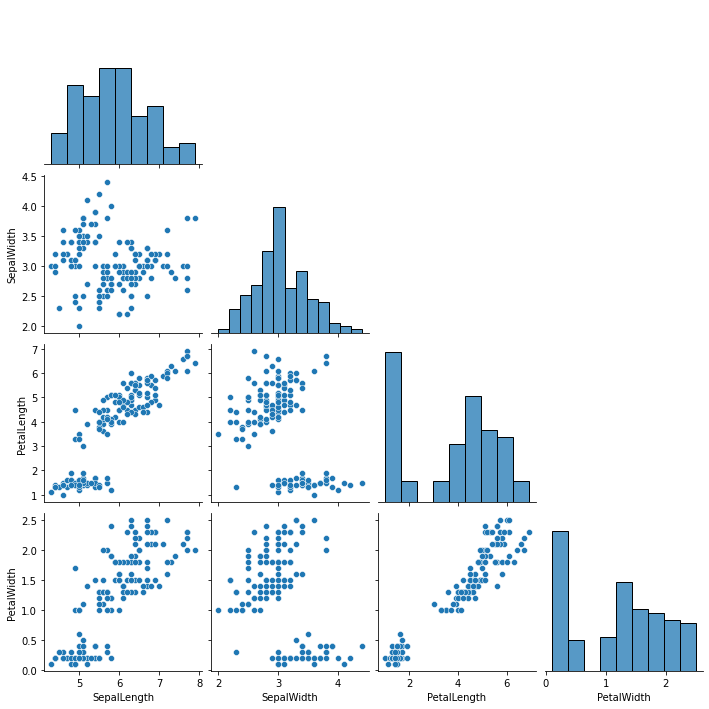

In [7]:
# Pairplot: Scatterplot of all variables
sp1= sns.pairplot(data= df1, diag_kind="hist",corner=True)
sp1

In [8]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
#Let's assume there are 2,3,4,5...? clusters/groups
K  = 3

#Creat the Kmeans box
km = KMeans(n_clusters = K, n_init='auto')

# Do K-means clustering (assing each point in the dataset to a cluster) 
yestimated1 = km.fit_predict(df1)


# Print estimated cluster of each point in the dataset
yestimated1

array([0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0,
       0, 2, 0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [9]:
# Add a new column to the dataset with the cluster information
df1['yestimated'] = yestimated1
df1.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,yestimated
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,0


In [10]:
# Print the labes of the existing clusters.
df1.yestimated.unique()


array([0, 2, 1], dtype=int32)

In [11]:
# Cluster centroides
ClustersC = km.cluster_centers_
ClustersC

array([[5.19375   , 3.63125   , 1.475     , 0.271875  ],
       [6.31458333, 2.89583333, 4.97395833, 1.703125  ],
       [4.73181818, 2.92727273, 1.77272727, 0.35      ]])

In [12]:
# Sum of squared error (sse) of the final model
km.inertia_

142.7540625

In [13]:
# The number of iterations required to converge
km.n_iter_

11

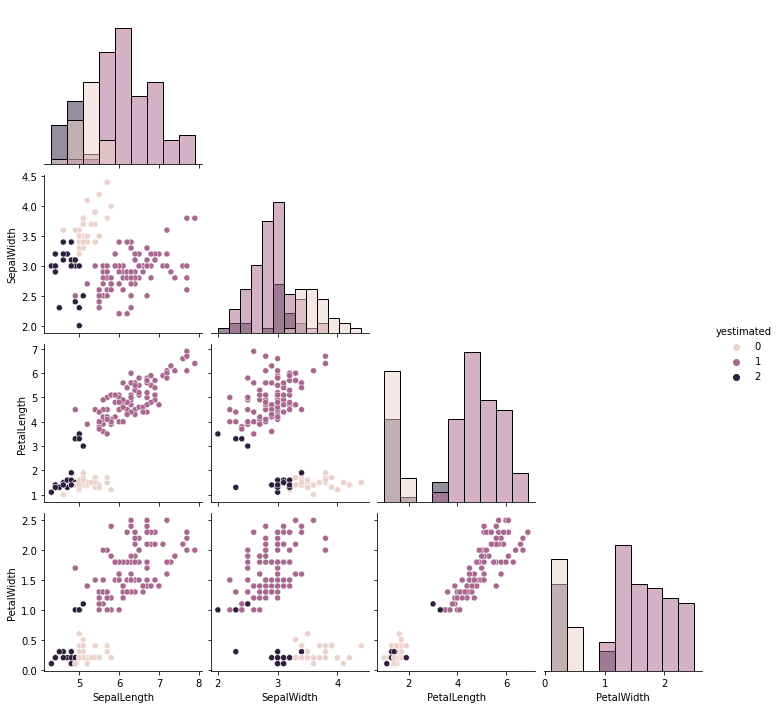

In [14]:
# Scatter plot of each cluster
sp2= sns.pairplot(data= df1, diag_kind="hist",corner=True,hue="yestimated")
sp2

In [15]:
# Intialize a list to hold sum of squared error (sse)
sse = []

# Define values of k
k_rng= range(1,10)

# For each k
for k in k_rng:
  km = KMeans(n_clusters=k,n_init="auto")
  km.fit_predict(df1[["SepalLength","PetalLength"]])
  sse.append(km.inertia_)


In [30]:
#Base de datos para el elbow
ng= [1,2,3,4,5,6,7,8,9] 
sse1 = pd.DataFrame({'Grupos': ng, 'sse':sse})
sse1

,Grupos,sse
0,1,566.493733
1,2,112.992072
2,3,53.809979
3,4,49.814874
4,5,25.634065
5,6,24.014102
6,7,18.884387
7,8,16.926267
8,9,13.438039


Text(0.5, 1.0, 'Elbow Plot')

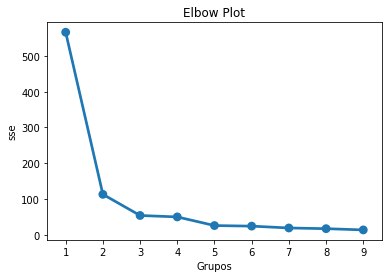

In [36]:
# Plot sse versus k
sp3 = sns.pointplot(data= sse1, x="Grupos", y="sse")
sp3.set_title("Elbow Plot")

**2. Do clustering with the iris flower dataset to form clusters using as features the two petal measurements: Drop out the other two features**

In [35]:
df2 = df.loc[:,["PetalLength","PetalWidth"]]
df2.head()

,PetalLength,PetalWidth
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


Text(0.5, 1.0, 'Gráfico de dispersión sobre ancho y largo del petalo')

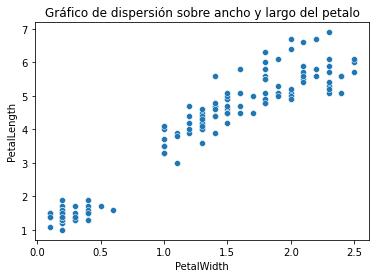

In [39]:
# Pairplot: Scatterplot of all variables
sp4= sns.scatterplot(data=df2,y="PetalLength",x="PetalWidth")
sp4.set_title("Gráfico de dispersión sobre ancho y largo del petalo")

In [40]:
# Define number of clusters
#Let's assume there are 2,3,4,5...? clusters/groups
K  = 3

#Creat the Kmeans box
km = KMeans(n_clusters = K, n_init='auto')

# Do K-means clustering (assing each point in the dataset to a cluster) 
yestimated2 = km.fit_predict(df2)


# Print estimated cluster of each point in the dataset
yestimated2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [41]:
# Add a new column to the dataset with the cluster information
df2['yestimated'] = yestimated2
df2.head()

,PetalLength,PetalWidth,yestimated
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


In [42]:
# Print the labes of the existing clusters.
df2.yestimated.unique()


array([1, 0, 2], dtype=int32)

In [43]:
# Cluster centroides
ClustersC = km.cluster_centers_
ClustersC

array([[4.26923077, 1.34230769],
       [1.462     , 0.246     ],
       [5.59583333, 2.0375    ]])

In [44]:
# Sum of squared error (sse) of the final model
km.inertia_

31.37135897435897

In [45]:
# The number of iterations required to converge
km.n_iter_

2

Text(0.5, 1.0, 'Gráfico de dispersión sobre ancho y largo del petalo por grupos')

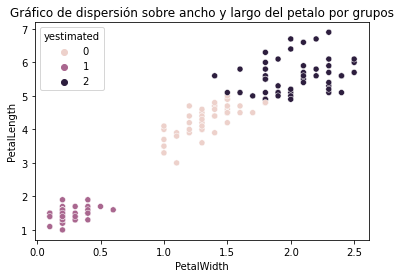

In [46]:
# Scatter plot of each cluster
sp5= sns.scatterplot(data=df2,y="PetalLength",x="PetalWidth",hue = 'yestimated')
sp5.set_title("Gráfico de dispersión sobre ancho y largo del petalo por grupos")

In [66]:
# Intialize a list to hold sum of squared error (sse)
sse2 = []

# Define values of k
k_rng= range(1,10)

# For each k
for k in k_rng:
  km = KMeans(n_clusters=k,n_init="auto")
  km.fit_predict(df2[["PetalLength","PetalWidth"]])
  sse2.append(km.inertia_)

In [67]:
#Base de datos para el elbow
sse2 = pd.DataFrame({'Grupos': ng, 'sse':sse2})
sse2

,Grupos,sse
0,1,550.895333
1,2,86.390220
2,3,31.371359
3,4,19.477123
4,5,13.983213
5,6,11.156897
6,7,9.741259
7,8,8.931860
8,9,7.132892


Text(0.5, 1.0, 'Elbow Plot')

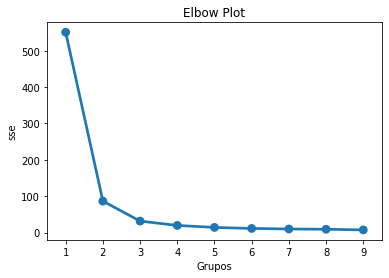

In [71]:
# Plot sse versus k
sp6 = sns.pointplot(data= sse2, x="Grupos", y="sse")
sp6.set_title("Elbow Plot")

**3. Do clustering with the iris flower dataset to form clusters using as features the two sepal measurements: Drop out the other two features**

In [53]:
df3 = df.loc[:,["SepalLength","SepalWidth"]]
df3.head()

,SepalLength,SepalWidth
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


Text(0.5, 1.0, 'Gráfico de dispersión sobre ancho y largo del petalo')

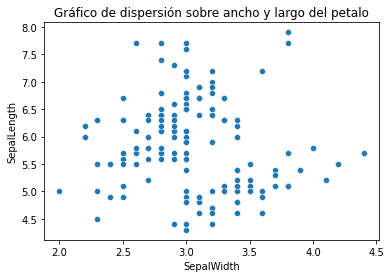

In [54]:
# Pairplot: Scatterplot of all variables
sp7= sns.scatterplot(data=df3,y="SepalLength",x="SepalWidth")
sp7.set_title("Gráfico de dispersión sobre ancho y largo del petalo")

In [73]:
# Define number of clusters
#Let's assume there are 2,3,4,5...? clusters/groups
K  = 4

#Creat the Kmeans box
km = KMeans(n_clusters = K, n_init='auto')

# Do K-means clustering (assing each point in the dataset to a cluster) 
yestimated3 = km.fit_predict(df3)


# Print estimated cluster of each point in the dataset
yestimated3

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 3, 0, 0, 3, 2, 3, 0, 3,
       0, 0, 0, 2, 2, 0, 0, 3, 3, 2, 0, 2, 3, 2, 0, 3, 2, 2, 0, 3, 3, 3,
       0, 2, 2, 3, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [74]:
# Add a new column to the dataset with the cluster information
df3['yestimated'] = yestimated3
df3.head()

,SepalLength,SepalWidth,yestimated
0,5.1,3.5,1
1,4.9,3.0,1
2,4.7,3.2,1
3,4.6,3.1,1
4,5.0,3.6,1


In [75]:
# Print the labes of the existing clusters.
df3.yestimated.unique()

array([1, 0, 2, 3], dtype=int32)

In [76]:
# Cluster centroides
ClustersC = km.cluster_centers_
ClustersC

array([[6.58571429e+00, 3.05714286e+00, 1.00000000e+00],
       [5.00600000e+00, 3.42800000e+00, 2.00000000e+00],
       [5.77358491e+00, 2.69245283e+00, 9.99200722e-16],
       [7.47500000e+00, 3.12500000e+00, 1.00000000e+00]])

In [77]:
# Sum of squared error (sse) of the final model
km.inertia_

29.942571428571434

In [78]:
# The number of iterations required to converge
km.n_iter_

4

Text(0.5, 1.0, 'Gráfico de dispersión sobre ancho y largo del sépalo por grupos')

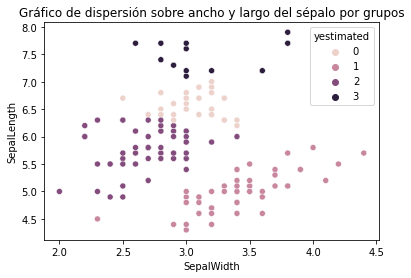

In [79]:
# Scatter plot of each cluster
sp8= sns.scatterplot(data=df3,y="SepalLength",x="SepalWidth",hue = 'yestimated')
sp8.set_title("Gráfico de dispersión sobre ancho y largo del sépalo por grupos")

In [80]:
# Intialize a list to hold sum of squared error (sse)
sse3 = []

# Define values of k
k_rng= range(1,10)

# For each k
for k in k_rng:
  km = KMeans(n_clusters=k,n_init="auto")
  km.fit_predict(df3[["SepalLength","SepalWidth"]])
  sse3.append(km.inertia_)

In [81]:
#Base de datos para el elbow
sse3 = pd.DataFrame({'Grupos': ng, 'sse':sse3})
sse3

,Grupos,sse
0,1,130.475267
1,2,58.204093
2,3,37.050702
3,4,28.034982
4,5,21.171898
5,6,17.818369
6,7,14.753496
7,8,13.415184
8,9,11.438471


Text(0.5, 1.0, 'Elbow Plot')

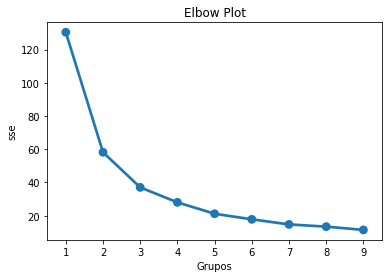

In [82]:
# Plot sse versus k
sp9 = sns.pointplot(data= sse3, x="Grupos", y="sse")
sp9.set_title("Elbow Plot")